<a href="https://colab.research.google.com/github/Pytlovan/Segmenta-o-PDI/blob/main/PDI_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 (permitido o uso de biblioteca ou códigos fornecidos):
Desenvolver uma segmentação usando cluster baseado em K-means para as imagens de maçãs
disponíveis no github da disciplina, implemente segmentação baseada em cluster K-means quando:


• O espaço de cores tridimensional é usado para agrupamento (RGB)


• O espaço de 5 dimensões é usado para agrupamento, onde as primeiras 3 dimensões são o
espaço de cores e as duas dimensões extras correspondem às dimensões X e Y da imagem.


Apresente também um gráfico (plot) de dispersão 3D para a imagem (A), ilustrando o agrupamento(mostrado apenas para imagem fornecida 2or4objects.jpg), sendo que os três eixos são RGB.

Além  disso, compare e contraste os resultados da parte (A) e da parte (B). Defina o valor de K
adequadamente com base no número de objetos nas imagens compartilhadas.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
from sklearn.cluster import KMeans
from tqdm import tqdm
from queue import Queue
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


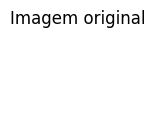

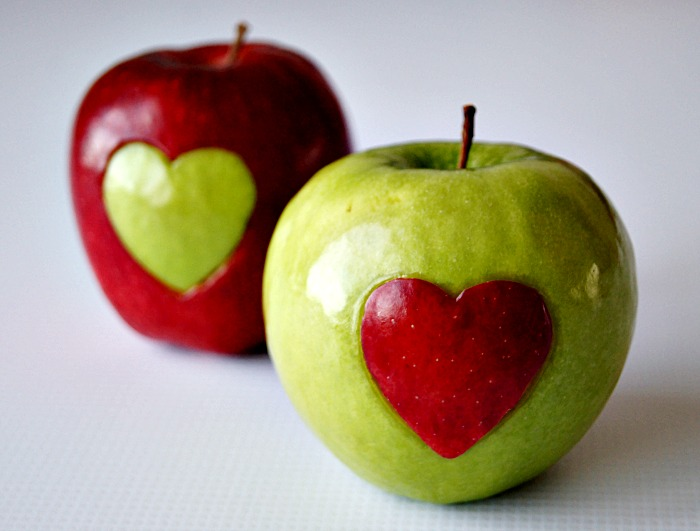

In [144]:
#image = '/content/drive/MyDrive/PDI_M2/2or4objects.jpg'
images = ['/content/drive/MyDrive/PDI_M2/2apples.jpg','/content/drive/MyDrive/PDI_M2/2or4objects.jpg','/content/drive/MyDrive/PDI_M2/7apples.jpg','/content/drive/MyDrive/PDI_M2/variableObjects.jpg']
ch = 1

image = cv2.imread(images[ch],1)
# Converter a imagem para o espaço de cores RGB (OpenCV carrega a imagem em BGR por padrão)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Visualizando a imagem original
plt.figure(figsize=(1, 1))
plt.title('Imagem original')
plt.axis('off')
plt.show()
cv2_imshow(image)

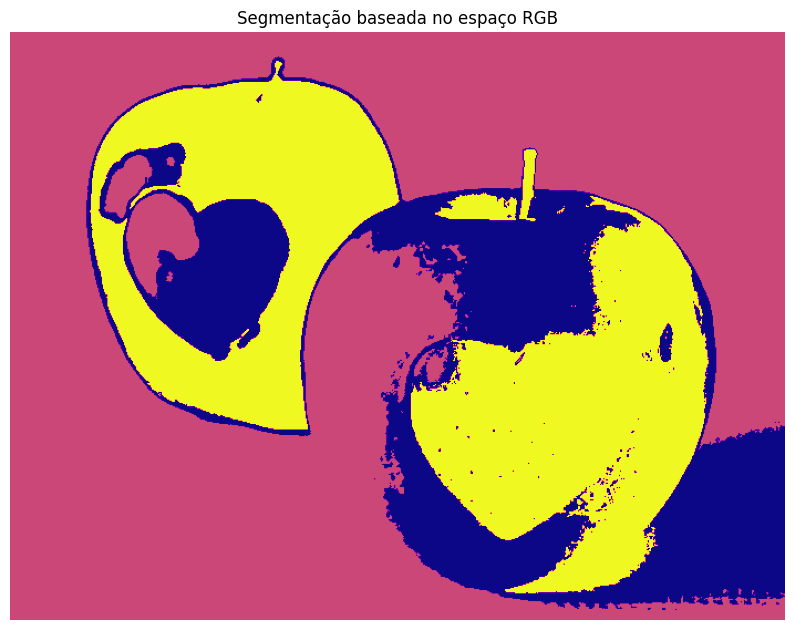

In [159]:
def segmented3D(image, K = 3, n_init = 1, tol = 1e-4):

    # Obtendo as dimensões da imagem
    h, w, c = image_rgb.shape

    # Flattening da imagem para vetor 2D para K-means
    pixels = image_rgb.reshape(-1, 3)

    # Aplicando K-means
    kmeans_rgb = KMeans(n_clusters=K, n_init = n_init, tol = tol, random_state=None).fit(pixels)
    labels_rgb = kmeans_rgb.labels_
    return labels_rgb.reshape(h, w)

segmented_image_rgb = segmented3D(image, n_init = 10)
# Visualizando o resultado
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image_rgb, cmap='plasma')
plt.title('Segmentação baseada no espaço RGB')
plt.axis('off')
plt.show()


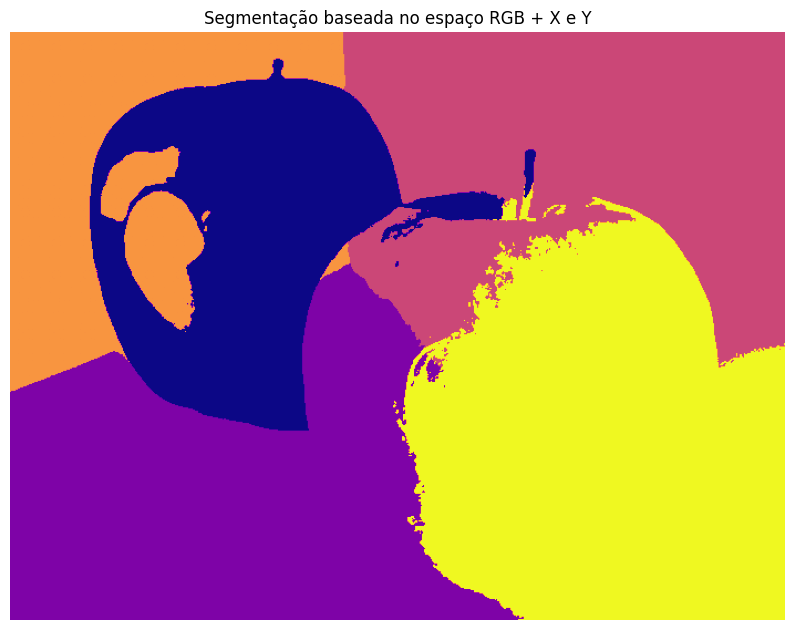

In [146]:
def segmented5D(image, K=5, n_init = 10, tol = 1e-4):
     # Obtendo as dimensões da imagem
    h, w, c = image_rgb.shape

    # Flattening da imagem para vetor 2D para K-means
    pixels = image_rgb.reshape(-1, 3)

    # Criando as coordenadas X e Y
    x_coords, y_coords = np.meshgrid(np.arange(w), np.arange(h))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()

    # Combinando RGB e coordenadas espaciais
    pixels_5d = np.column_stack((pixels, x_coords_flat, y_coords_flat))

    # Aplicando K-means no espaço 5D
    kmeans_5d = KMeans(n_clusters=K, n_init = n_init, tol = tol, random_state=None).fit(pixels_5d)
    labels_5d = kmeans_5d.labels_
    return labels_5d.reshape(h, w)

segmented_image_5d = segmented5D(image)
# Visualizando o resultado
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image_5d, cmap='plasma')
plt.title('Segmentação baseada no espaço RGB + X e Y')
plt.axis('off')
plt.show()

In [155]:
images = [segmented3D(image), segmented5D(image, 3), segmented3D(image,5), segmented5D(image), segmented3D(image, 8), segmented5D(image,8), segmented3D(image, 15), segmented5D(image, 15)]

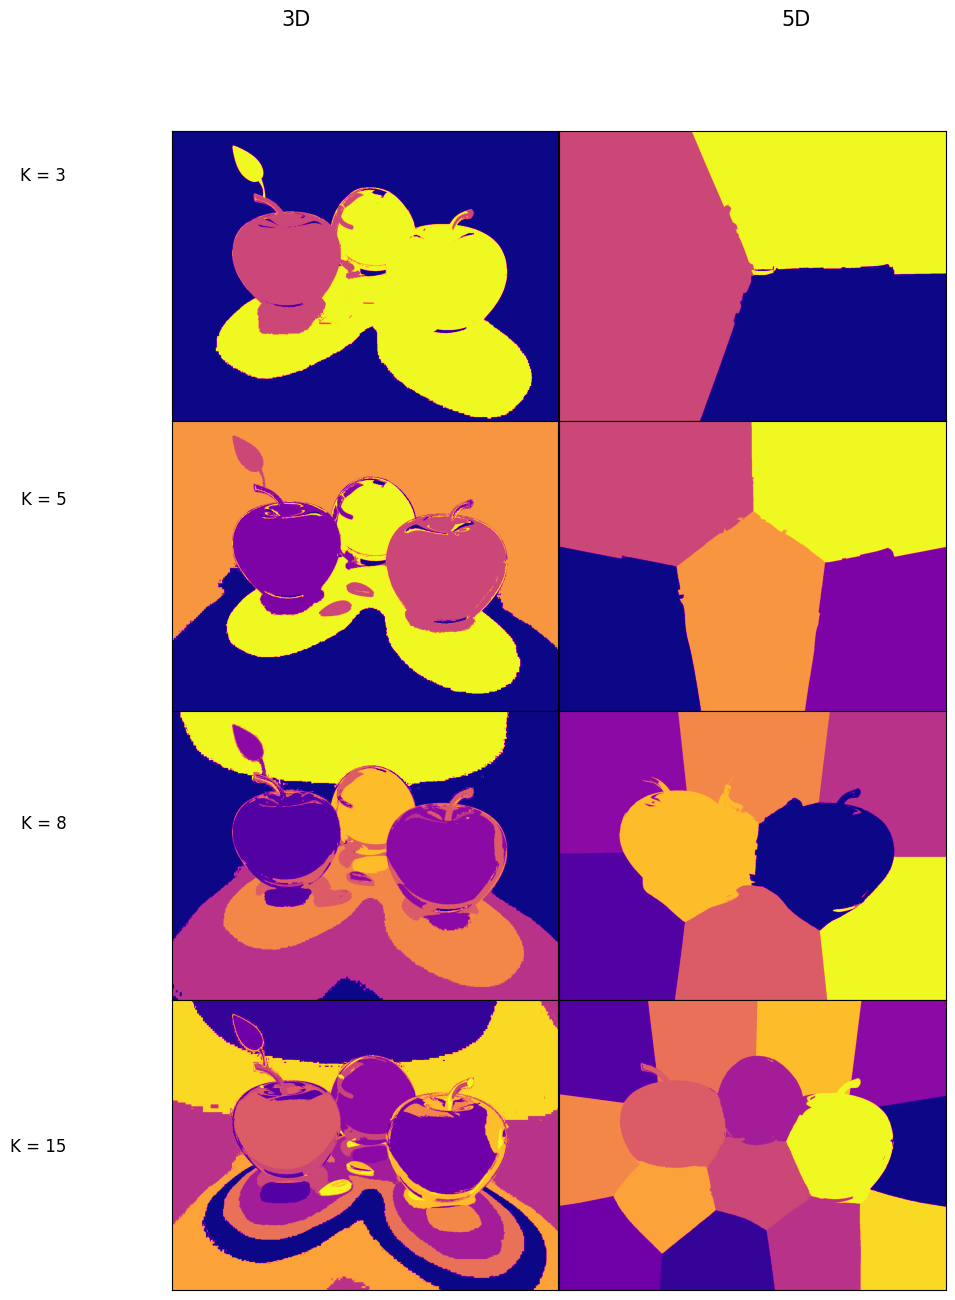

In [142]:
fig, axs = plt.subplots(4, 2, figsize=(10, 15.05))

# Loop through the axes and add images
for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap = 'plasma')
    ax.set_xticks([])  # Remove x-ticks for better visibility
    ax.set_yticks([])  # Remove y-ticks for better visibility

plt.subplots_adjust(wspace = 0, hspace = 0)

# Set overall labels at the top of the figure
fig.text(0.25, 0.95, '3D', ha='center', fontsize=15)
fig.text(0.75, 0.95, '5D', ha='center', fontsize=15)

row_labels = ['K = 3', 'K = 5', 'K = 8', 'K = 15']
for i, label in enumerate(row_labels):
    fig.text(0.02, 0.85 - i * 0.215, label, va='center', ha='right', fontsize=12)
# Display the plot

plt.show()

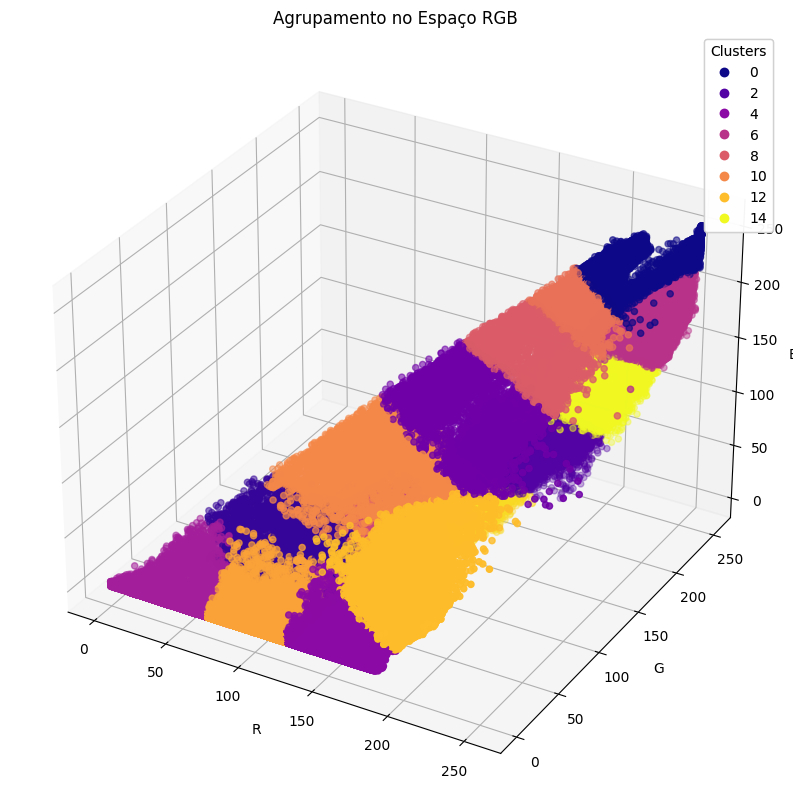

In [154]:
# Plotando gráfico de dispersão 3D para espaço RGB
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

h, w, c = image_rgb.shape
pixels = image_rgb.reshape(-1, 3)
K = 15
n_init = 10
tol = 1e-4

kmeans_rgb = KMeans(n_clusters=K, n_init = n_init, tol = tol, random_state=None).fit(pixels)
labels_rgb = kmeans_rgb.labels_

scatter = ax.scatter(pixels[:, 0], pixels[:, 1], pixels[:, 2], c=labels_rgb, cmap='plasma')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title('Agrupamento no Espaço RGB')
plt.show()

# Projeto 2 (implementação “from scratch”):
Realizar a detecção de rosto para as imagens de rosto disponíveis no github da disciplina, implemente
os seguintes métodos para detecção de rosto:

• Skin color thresholding: Escolha um intervalo de valores de pixel apropriado para a pele (use
suas habilidades de “pesquisa no Google”). Limite os valores de pixels com base neste intervalo
para obter regiões da pele. (Dica: para realizar esta operação, RGB é um bom espaço de cores?).
Uma abordagem é apresentada em: https://arxiv.org/ftp/arxiv/papers/1708/1708.02694.pdf

• Segmentação semeada (Seeded segmentation): Para isso, selecione manualmente um pixel da
região da face. Analise recursivamente a média dos pixels da vizinhança usando a intensidade
média de execução da pele, definindo uma tolerância apropriada. Dica: pesquise sobre
“SeedPointSegmentation” para encontrar abordagens

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from queue import Queue
from google.colab.patches import cv2_imshow
from google.colab import drive
from sklearn.cluster import KMeans
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


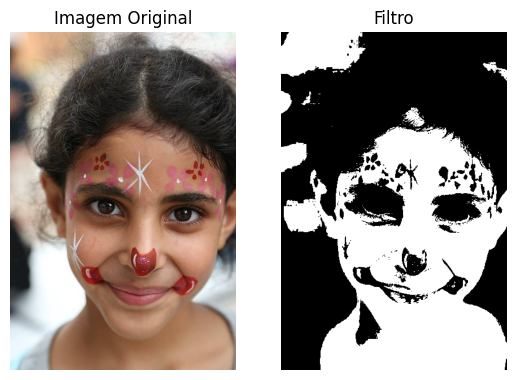

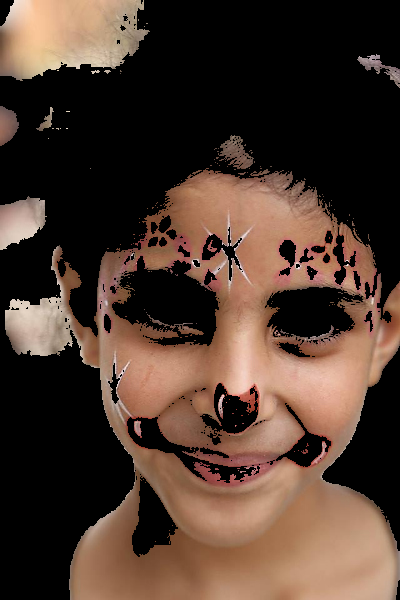

In [ ]:
image = cv2.imread('/content/drive/MyDrive/PDI_M2/face4.jpg')
img_height, img_width, lixo = image.shape  # Altura e Largura da imagem
output = np.zeros((img_height, img_width,3), dtype=float)  # Inicializa o output
# Converter a imagem para o espaço de cores RGB (OpenCV carrega a imagem em BGR por padrão)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converter a imagem do espaço de cores RGB para YCrCb (Luminance, Chrominance components - Cr, Chrominance components - Cb = 0, 1, 2).
image_ycrcb = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)

A = 100

for i in range(img_height):  # Loop usando i
  for j in range(img_width):  # Loop usando j
    if image_rgb[i,j,0] > 95 and image_rgb[i,j,1] > 40 and image_rgb[i,j,2] > 20 and image_rgb[i,j,0] > image_rgb[i,j,1] and image_rgb[i,j,0] > image_rgb[i,j,2] and abs(image_rgb[i,j,0] - image_rgb[i,j,1]) > 15 and A > 15 and image_ycrcb[i,j,1] > 135 and image_ycrcb[i,j,2] > 85 and image_ycrcb[i,j,0] > 80 and image_ycrcb[i,j,1] <= (1.5862*image_ycrcb[i,j,2])+20 and (image_ycrcb[i,j,1]>=(0.3448*image_ycrcb[i,j,2])+76.2069) and (image_ycrcb[i,j,1] >= (-4.5652*image_ycrcb[i,j,2])+234.5652) and (image_ycrcb[i,j,1] <= (-1.15*image_ycrcb[i,j,2])+301.75) and (image_ycrcb[i,j,1] <= (-2.2857*image_ycrcb[i,j,2])+432.85):
      output[i][j]=image[i][j]

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title('Filtro')
plt.axis('off')

plt.show()

cv2_imshow(output)



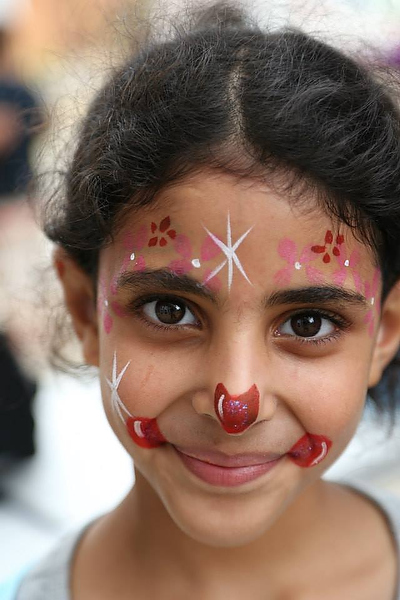

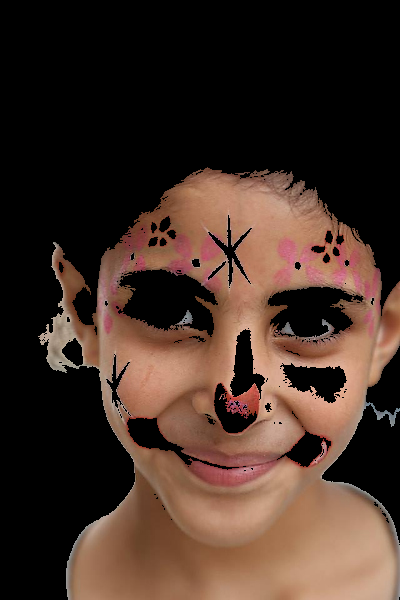

In [165]:
def checkPoint(img, point, visited):
   if 0 <= point[0] < img.shape[0] and 0 <= point[1] < img.shape[1]:
       if visited[point[0], point[1]] == 1: #
           return 0
       return 1
   return 0

def updatePixel(img, point, tolerance, result, average, count):
   B = abs(float(img[point[0], point[1], 0]) - average[0] / count)
   G = abs(float(img[point[0], point[1], 1]) - average[1] / count)
   R = abs(float(img[point[0], point[1], 2]) - average[2] / count)

   if B < tolerance and G < tolerance and R < tolerance:
       result[point[0], point[1], 0] = img[point[0], point[1], 0] # receive img in point, but band 0
       result[point[0], point[1], 1] = img[point[0], point[1], 1] # receive img in point, but band 1
       result[point[0], point[1], 2] = img[point[0], point[1], 2] # receive img in point, but band 2
       average[0] += float(img[point[0], point[1], 0])
       average[1] += float(img[point[0], point[1], 1])
       average[2] += float(img[point[0], point[1], 2])
       count += 1
       return 1, result, average, count
   return 0, result, average, count

def ShowResults(filename, result):
   cv2.imwrite(filename, result)

def SeedPointSegmentation(img, seedPoint, tolerance, imgNameOut="out_seed_seg.png"):
    Tolerance = (tolerance - np.min(img))/(np.max(img)-np.min(img))*255 # normalize the value of tolerance to limit of pixel value (eg. 8b is 255)
    Visited = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    Result = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    Average = [float(img[seedPoint[0], seedPoint[1], 0]), float(img[seedPoint[0], seedPoint[1], 1]), float(img[seedPoint[0], seedPoint[1], 2])]
    Count = 1

    Q = Queue()
    Q.put([seedPoint[0], seedPoint[1]])
    Visited[seedPoint[0], seedPoint[1]] = 1

    while Q.qsize() > 0:
        # print(Q.qsize())
        CurrentPoint = Q.get()
        Ret, Result, Average, Count  = updatePixel(img, CurrentPoint, Tolerance, Result, Average, Count)
        if Ret == 0:
            continue

        p1 = [CurrentPoint[0] + 1, CurrentPoint[1]] # receive a list with [current point index 0 + 1, current point index 1]
        p2 = [CurrentPoint[0] - 1, CurrentPoint[1]] # receive a list with [current point index 0 - 1, current point index 1]
        p3 = [CurrentPoint[0], CurrentPoint[1] - 1] # receive a list with [current point index 0, current point index 1 - 1]
        p4 = [CurrentPoint[0], CurrentPoint[1] + 1] # receive a list with [current point index 0, current point index 1 + 1]

        if checkPoint(img, p1, Visited):
            Q.put(p1)
            Visited[p1[0], p1[1]] = 1
        if checkPoint(img, p2, Visited):
            Q.put(p2)
            Visited[p2[0], p2[1]] = 1
        if checkPoint(img, p3, Visited):
            Q.put(p3)
            Visited[p3[0], p3[1]] = 1
        if checkPoint(img, p4, Visited):
            Q.put(p4)
            Visited[p4[0], p4[1]] = 1

    ShowResults(imgNameOut, Result)
    cv2_imshow(Result)

# Image Reading
ImageList = ["face1.jpg", "face2.jpg", "face3.jpg", "face4.jpg", "colors.jpg"]
Image = cv2.imread('/content/drive/MyDrive/PDI_M2/face4.jpg')

# Seed based segmentation
#seedPoint = [600, 950]
# seedPoint = [250, 250]
# seedPoint = [200, 350]
seedPoint = [200, 201]
cv2_imshow(Image)
SeedPointSegmentation(Image, seedPoint,63)

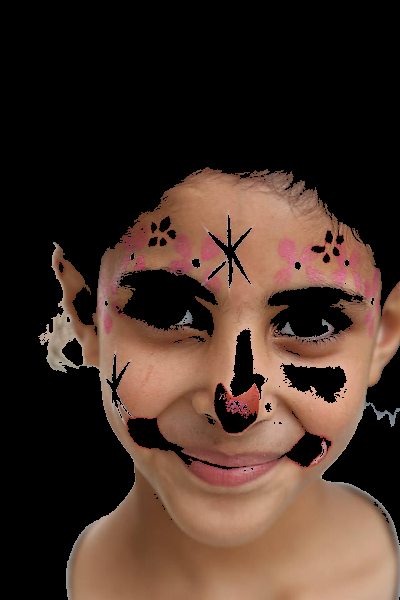

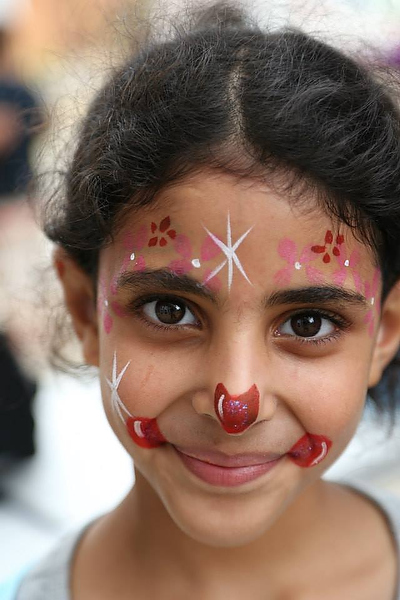

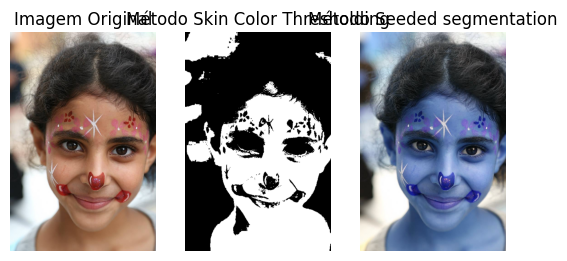

In [160]:
def checkPoint(img, point, visited):
   if 0 <= point[0] < img.shape[0] and 0 <= point[1] < img.shape[1]:
       if visited[point[0], point[1]] == 1: #
           return 0
       return 1
   return 0

def updatePixel(img, point, tolerance, result, average, count):
   B = abs(float(img[point[0], point[1], 0]) - average[0] / count)
   G = abs(float(img[point[0], point[1], 1]) - average[1] / count)
   R = abs(float(img[point[0], point[1], 2]) - average[2] / count)

   if B < tolerance and G < tolerance and R < tolerance:
       result[point[0], point[1], 0] = img[point[0], point[1], 0] # receive img in point, but band 0
       result[point[0], point[1], 1] = img[point[0], point[1], 1] # receive img in point, but band 1
       result[point[0], point[1], 2] = img[point[0], point[1], 2] # receive img in point, but band 2
       average[0] += float(img[point[0], point[1], 0])
       average[1] += float(img[point[0], point[1], 1])
       average[2] += float(img[point[0], point[1], 2])
       count += 1
       return 1, result, average, count
   return 0, result, average, count

def ShowResults(filename, result):
   cv2.imwrite(filename, result)

def SeedPointSegmentation(img, seedPoint, tolerance, imgNameOut="out_seed_seg.png"):
   Tolerance = (tolerance - np.min(img))/(np.max(img)-np.min(img))*255 # normalize the value of tolerance to limit of pixel value (eg. 8b is 255)
   Visited = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
   Result = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
   Average = [float(img[seedPoint[0], seedPoint[1], 0]), float(img[seedPoint[0], seedPoint[1], 1]), float(img[seedPoint[0], seedPoint[1], 2])]
   Count = 1

   Q = Queue()
   Q.put([seedPoint[0], seedPoint[1]])
   Visited[seedPoint[0], seedPoint[1]] = 1

   while Q.qsize() > 0:
      # print(Q.qsize())
      CurrentPoint = Q.get()
      Ret, Result, Average, Count  = updatePixel(img, CurrentPoint, Tolerance, Result, Average, Count)
      if Ret == 0:
          continue

      p1 = [CurrentPoint[0] + 1, CurrentPoint[1]] # receive a list with [current point index 0 + 1, current point index 1]
      p2 = [CurrentPoint[0] - 1, CurrentPoint[1]] # receive a list with [current point index 0 - 1, current point index 1]
      p3 = [CurrentPoint[0], CurrentPoint[1] - 1] # receive a list with [current point index 0, current point index 1 - 1]
      p4 = [CurrentPoint[0], CurrentPoint[1] + 1] # receive a list with [current point index 0, current point index 1 + 1]

      if checkPoint(img, p1, Visited):
         Q.put(p1)
         Visited[p1[0], p1[1]] = 1
      if checkPoint(img, p2, Visited):
         Q.put(p2)
         Visited[p2[0], p2[1]] = 1
      if checkPoint(img, p3, Visited):
         Q.put(p3)
         Visited[p3[0], p3[1]] = 1
      if checkPoint(img, p4, Visited):
         Q.put(p4)
         Visited[p4[0], p4[1]] = 1

   #ShowResults(imgNameOut, Result)
   cv2_imshow(Result)

# Image Reading
ImageList = ["face1.jpg", "face2.jpg", "face3.jpg", "face4.jpg", "colors.jpg"]
Image_Seed = cv2.imread('/content/drive/MyDrive/PDI_M2/face4.jpg')

# Seed based segmentation
seedPoint = [200, 200]
SeedPointSegmentation(Image_Seed, seedPoint,63)

cv2_imshow(Image_Seed)



image = cv2.imread('/content/drive/MyDrive/PDI_M2/face4.jpg')
img_height, img_width, lixo = image.shape  # Altura e Largura da imagem
output = np.zeros((img_height, img_width,3), dtype=float)  # Inicializa o output
# Converter a imagem para o espaço de cores RGB (OpenCV carrega a imagem em BGR por padrão)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converter a imagem do espaço de cores RGB para YCrCb (Luminance, Chrominance components - Cr, Chrominance components - Cb = 0, 1, 2).
image_ycrcb = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2YCrCb)

A = 100

for i in range(img_height):  # Loop usando i
  for j in range(img_width):  # Loop usando j
    if image_rgb[i,j,0] > 95 and image_rgb[i,j,1] > 40 and image_rgb[i,j,2] > 20 and image_rgb[i,j,0] > image_rgb[i,j,1] and image_rgb[i,j,0] > image_rgb[i,j,2] and abs(image_rgb[i,j,0] - image_rgb[i,j,1]) > 15 and A > 15 and image_ycrcb[i,j,1] > 135 and image_ycrcb[i,j,2] > 85 and image_ycrcb[i,j,0] > 80 and image_ycrcb[i,j,1] <= (1.5862*image_ycrcb[i,j,2])+20 and (image_ycrcb[i,j,1]>=(0.3448*image_ycrcb[i,j,2])+76.2069) and (image_ycrcb[i,j,1] >= (-4.5652*image_ycrcb[i,j,2])+234.5652) and (image_ycrcb[i,j,1] <= (-1.15*image_ycrcb[i,j,2])+301.75) and (image_ycrcb[i,j,1] <= (-2.2857*image_ycrcb[i,j,2])+432.85):
      output[i][j]=image[i][j]

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output)
plt.title('Método Skin Color Thresholding')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Image_Seed)
plt.title('Método Seeded segmentation')
plt.axis('off')

plt.show()

